# Import The Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
# sns.color_palette("Set3", as_cmap=True)
sns.set_style('darkgrid')
%matplotlib inline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor


# Store The Data Into Dataset

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Checking first five data of data frame

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Checking number of rows and column

In [4]:
df.shape

(1470, 35)

# Column and their data type

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# Checking the null value

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Looking for Numeric And Categorical column

In [7]:
numeric_cols = df.select_dtypes(include=['int64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# First five data of numeric column

In [8]:
df[numeric_cols].head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


Some column are not their, so we have to set max column and row 

In [9]:
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

In [10]:
df[numeric_cols].head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2


In [11]:
df[categorical_cols]

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


# View the some stats about data

In [12]:
df[numeric_cols].describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Getting the count of the number of employee that stayed and left the company

In [13]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

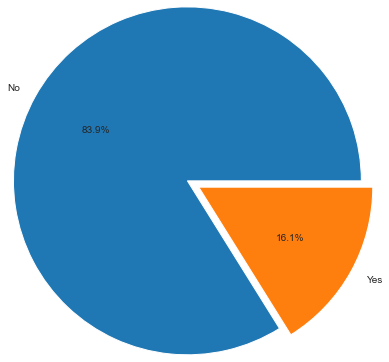

In [14]:
r = df.groupby('Attrition')['Attrition'].count()
plt.pie(r, explode=[0.05, 0.1], labels=['No', 'Yes'], radius=2.0, autopct='%1.1f%%',  shadow=False);


In above pie chart only 16.1% of employee are left the company and 83.9 has stay in company.

In [15]:
df[categorical_cols]

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


# Checking value count of categorical data

In [16]:
df['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [17]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [18]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [19]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [20]:
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [21]:
df['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [22]:
df['Over18'].value_counts()

Y    1470
Name: Over18, dtype: int64

In [23]:
df['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

# Replace yes with 1 and No with 0

In [24]:
df.Attrition.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)

In [25]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# Droping irrelevant column

In [26]:
df = df.drop(columns=['StandardHours','EmployeeCount','Over18'])

In [27]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


# Data visualisation

C:\Users\Kaushik\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

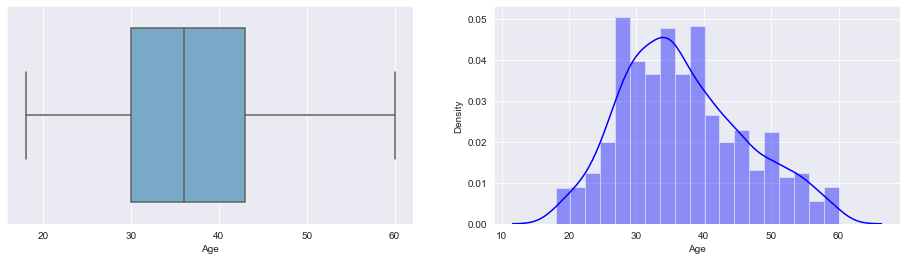

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.boxplot(ax = axes[0],palette = "Blues", x = df['Age'])
sns.distplot(ax = axes[1],color = "Blue",a=df["Age"])

C:\Users\Kaushik\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

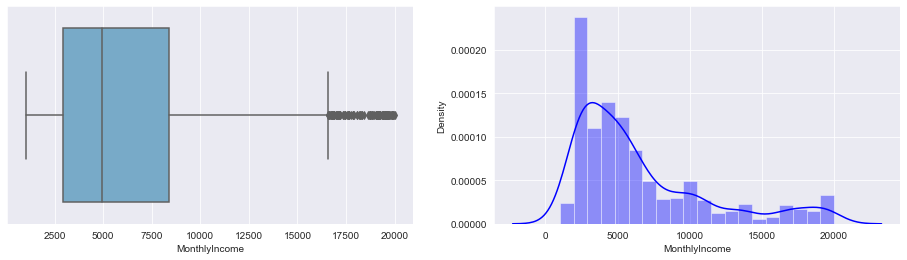

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.boxplot(ax = axes[0],palette = "Blues",x = df['MonthlyIncome'])
sns.distplot(ax = axes[1],color = "Blue",a=df["MonthlyIncome"])

In [30]:
# checking the outlier count
len(df[df['MonthlyIncome']>17500])

81

C:\Users\Kaushik\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Density'>

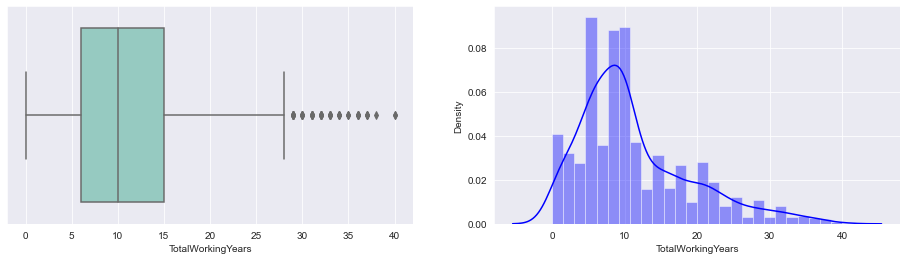

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.boxplot(ax = axes[0],palette = "Set3", x = df['TotalWorkingYears'])
sns.distplot(ax = axes[1],color = "Blue" ,a=df["TotalWorkingYears"])

In [32]:
len(df[df['TotalWorkingYears']>27])

77

C:\Users\Kaushik\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsAtCompany', ylabel='Density'>

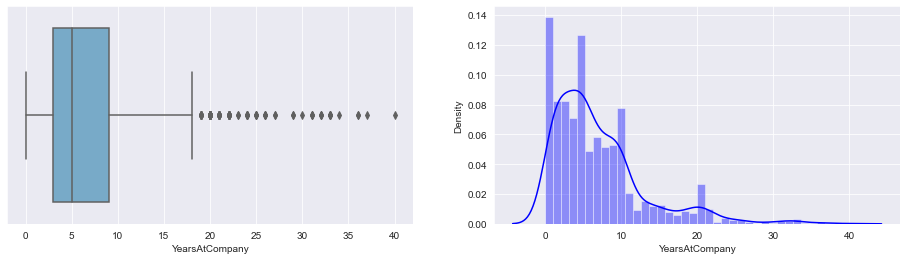

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.boxplot(ax = axes[0],palette = "Blues",x = df['YearsAtCompany'])
sns.distplot(ax = axes[1],color = "Blue" ,a=df["YearsAtCompany"])

In [34]:
len(df[df['YearsAtCompany']>18])

104

C:\Users\Kaushik\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='Density'>

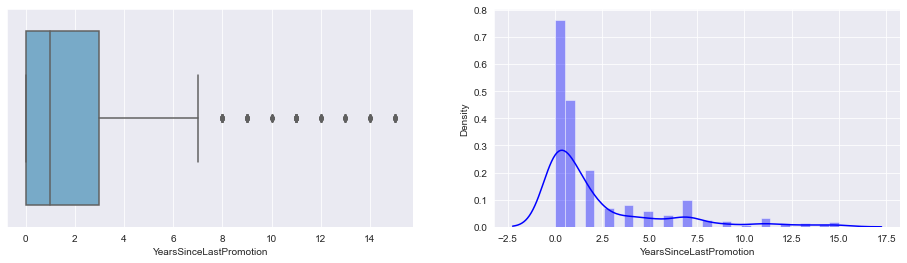

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
sns.boxplot(ax = axes[0], palette = "Blues", x = df['YearsSinceLastPromotion'])
sns.distplot(ax = axes[1],color = "Blue", a=df["YearsSinceLastPromotion"])

In [36]:
len(df[df['YearsSinceLastPromotion']>7])

107

This is true outlier we have remove this outlier

In [37]:
df = df[df['YearsSinceLastPromotion']<7]

In [38]:
# checking the left data frame
len(df)

1287

<AxesSubplot:>

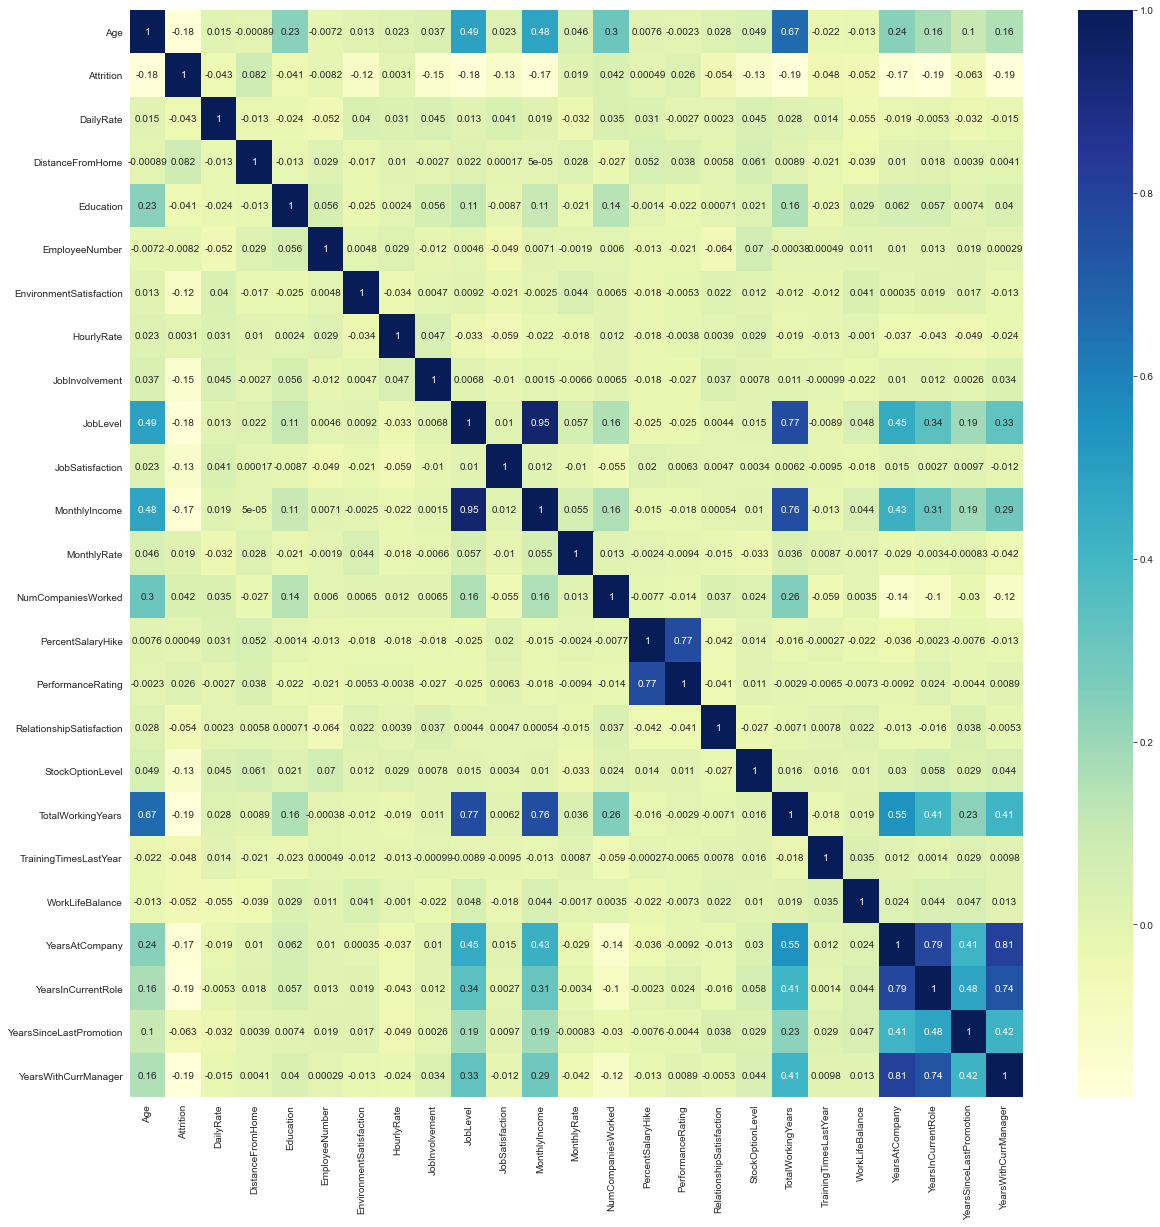

In [39]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

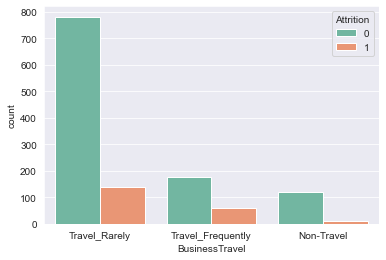

In [40]:
sns.countplot(x='BusinessTravel',palette = "Set2", hue='Attrition', data=df)

<AxesSubplot:xlabel='Department', ylabel='count'>

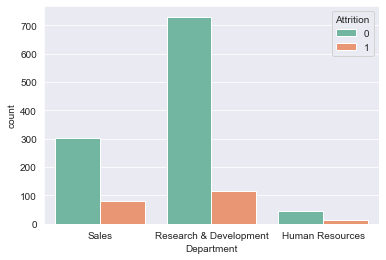

In [41]:
sns.countplot(x='Department', hue='Attrition', palette = "Set2", data=df)

<AxesSubplot:xlabel='EducationField', ylabel='count'>

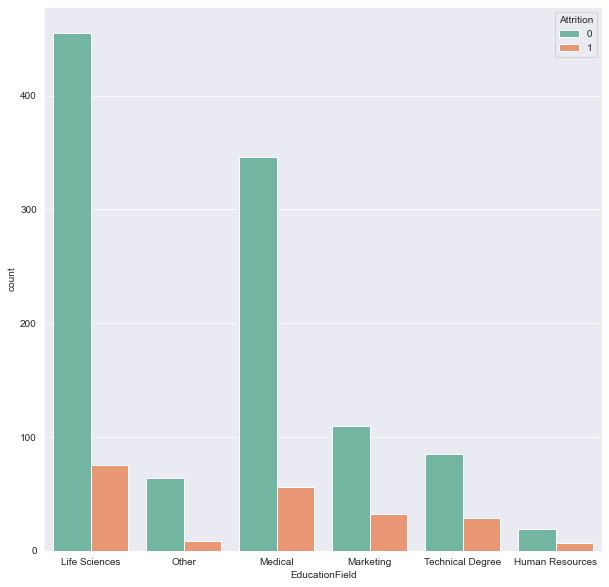

In [42]:
plt.figure(figsize=(10,10))
sns.countplot(x='EducationField', hue='Attrition', palette = "Set2", data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

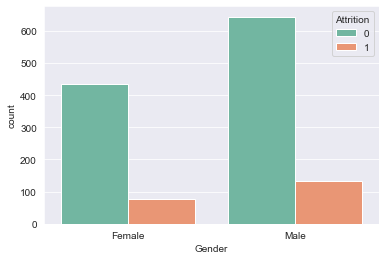

In [43]:
sns.countplot(x='Gender', hue='Attrition', palette = "Set2", data=df)

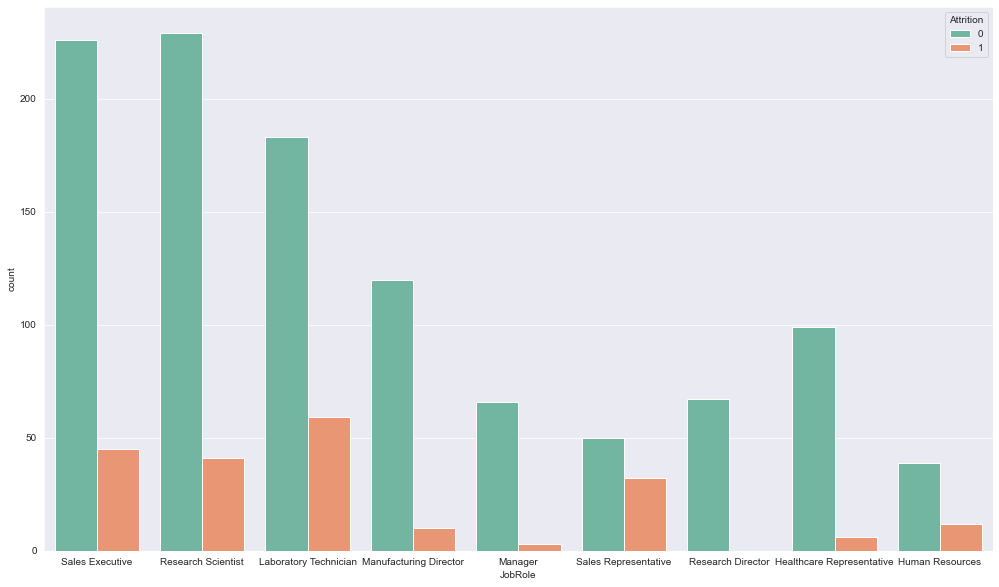

In [44]:
plt.figure(figsize=(17,10))
sns.countplot(x='JobRole', hue='Attrition', palette = "Set2", data=df);

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

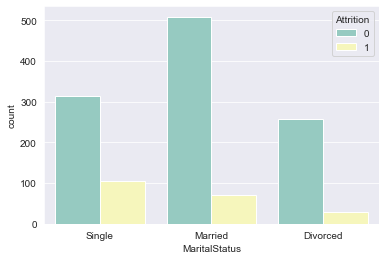

In [45]:
sns.countplot(x='MaritalStatus', hue='Attrition', palette = "Set3", data=df)

<AxesSubplot:xlabel='OverTime', ylabel='count'>

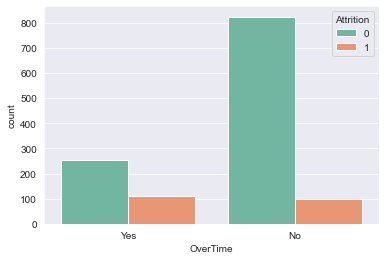

In [46]:
sns.countplot(x='OverTime', hue='Attrition', palette = "Set2", data=df)


# Preparing data for training

In [47]:
df["Attrition"] = LabelEncoder().fit_transform(df['Attrition'])
df["BusinessTravel"] = LabelEncoder().fit_transform(df['BusinessTravel'])
df["Department"] = LabelEncoder().fit_transform(df['Department'])
df["EducationField"] = LabelEncoder().fit_transform(df['EducationField'])
df["Gender"] = LabelEncoder().fit_transform(df['Gender'])
df["JobRole"] = LabelEncoder().fit_transform(df['JobRole'])
df["MaritalStatus"] = LabelEncoder().fit_transform(df['MaritalStatus'])
df["OverTime"] = LabelEncoder().fit_transform(df['OverTime'])

In [48]:
numeric_cols.remove('StandardHours')
numeric_cols.remove('EmployeeCount')

In [49]:
df[numeric_cols] = MinMaxScaler().fit_transform(df[numeric_cols])

In [50]:
cols = list(df.columns)
cols.remove("Attrition")
sampled,target = SMOTE().fit_resample(df[cols],df["Attrition"])

In [51]:
X_train,X_test,Y_train,Y_test = train_test_split(sampled[cols],target,test_size = 0.3,shuffle=True)

# Model Training

In [52]:
from sklearn.metrics import mean_absolute_error
logistic_model = LogisticRegression(solver='liblinear',random_state=0).fit(X_train,Y_train)
predictions = logistic_model.predict(X_test)
print("Train Accuracy : {:.2f} %".format(accuracy_score(logistic_model.predict(X_train),Y_train)))
print("Test Accuracy : {:.2f} %".format(accuracy_score(logistic_model.predict(X_test),Y_test)))
mae = mean_absolute_error(Y_test, predictions)
print(mae)


Train Accuracy : 0.77 %
Test Accuracy : 0.77 %
0.2330246913580247


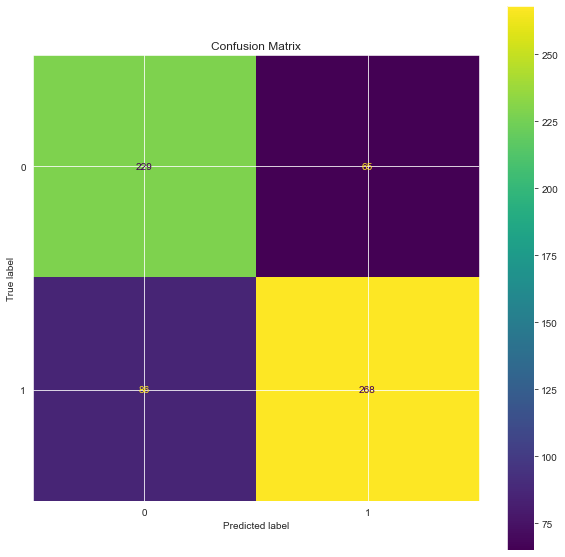

In [53]:
cm = confusion_matrix(Y_test,logistic_model.predict(X_test))
classes = ["0","1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.show()

In [54]:
random_forest = RandomForestClassifier(n_estimators=590,random_state=0).fit(X_train,Y_train)
predictions = random_forest.predict(X_test)
print("Train Accuracy : {:.2f} %".format(accuracy_score(random_forest.predict(X_train),Y_train)))
print("Test Accuracy : {:.2f} %".format(accuracy_score(random_forest.predict(X_test),Y_test)))
mae = mean_absolute_error(Y_test, predictions)
print(mae)

Train Accuracy : 1.00 %
Test Accuracy : 0.92 %
0.07716049382716049


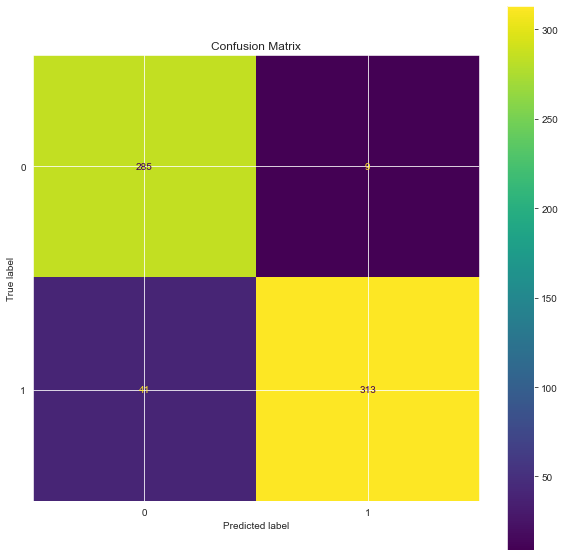

In [55]:
cm = confusion_matrix(Y_test,random_forest.predict(X_test))
classes = ["0","1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.show()

In [56]:
from xgboost import XGBClassifier
model = XGBClassifier(learning_rate=0.01,n_estimators=2000,use_label_encoder=False,random_state=420).fit(X_train,Y_train)
predictions = model.predict(X_test)
print("Train Accuracy : {:.2f} %".format(accuracy_score(model.predict(X_train),Y_train)))
print("Test Accuracy : {:.2f} %".format(accuracy_score(model.predict(X_test),Y_test)))
mae = mean_absolute_error(Y_test, predictions)
print(mae)

[22:08:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Accuracy : 1.00 %
Test Accuracy : 0.93 %
0.06790123456790123


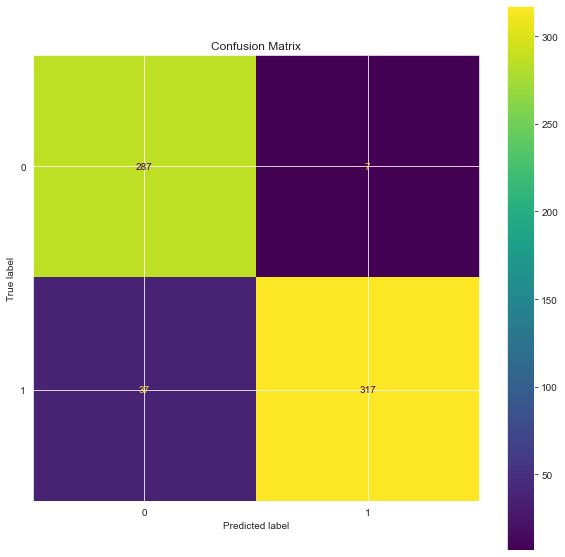

In [57]:
cm = confusion_matrix(Y_test,model.predict(X_test))
classes = ["0","1"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.show()

In [58]:
y_pred_train = logistic_model.predict(X_train)

In [59]:
y_pred_test = logistic_model.predict(X_test)

In [60]:
from sklearn import metrics
MAE_train = metrics.mean_absolute_error(Y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(Y_test, y_pred_test)

print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

print('----------------------------------------------------------------------------------------')

MSE_train = metrics.mean_squared_error(Y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(Y_test, y_pred_test)

print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

print('----------------------------------------------------------------------------------------')

RMSE_train = np.sqrt( metrics.mean_squared_error(Y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(Y_test, y_pred_test))

print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

MAE for training set is 0.23311258278145697
MAE for test set is 0.2330246913580247
----------------------------------------------------------------------------------------
MSE for training set is 0.23311258278145697
MSE for test set is 0.2330246913580247
----------------------------------------------------------------------------------------
RMSE for training set is 0.4828173389403667
RMSE for test set is 0.48272631102729907


# Conclusion: Random forest is the best model it gives accuracy 94%